In [14]:
#Importando as bibliotecas
import numpy as np #Nos ajuda a executar facilmente cálculos numéricos 
import pandas as pd #Nos ajudará com a análise de dados
import matplotlib.pyplot as plt #Criação de gráficos 
import seaborn as sns #Visualização de dados, baseada no Matplotlib
%matplotlib inline

In [15]:
#Importando nosso DataSet
data = pd.read_csv('crime.csv', encoding='latin-1')

In [16]:
#Consultando as 10 primeiras informações do nosso Data Frame.
data.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,2018-10-02 20:40:00,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,2018-10-03 20:16:00,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,2018-10-03 19:32:00,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,2018-10-03 19:27:51,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


In [17]:
#Iremos ultilizar apenas os anos que temos completos, pois 2015 temos dados apartir de Junho e 2018 só até setembro.
data = data.loc[data['YEAR'].isin([2016,2017])]

#Mantenha apenas os dados - Part One (UCR_PART)
data = data.loc[data['UCR_PART'] == 'Part One']

#Removemos algumas colunas que não seram utilizadas
data = data.drop(['INCIDENT_NUMBER','OFFENSE_CODE','UCR_PART','Location', 'Lat', 'Long', 'SHOOTING'], axis=1)

#Converter DAY_OF_WEEK para uma categoria ordenada
data.DAY_OF_WEEK = pd.Categorical(data.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

#Iremos renomear nossas colunas.
rename = {'OFFENSE_CODE_GROUP':'Crimes',
         'OFFENSE_DESCRIPTION':'Descrição',
         'DISTRICT':'Distrito',
         'REPORTING_AREA':'Área',
         'OCCURRED_ON_DATE':'Data',
         'YEAR':'Ano',
         'MONTH':'Mês',
         'DAY_OF_WEEK':'Dias da Semana',
         'HOUR':'Hora',
         'STREET':'Rua'}
data.rename(index=str, columns=rename, inplace=True)

#Observamos as conclusões do código acima
data.head()

,Crimes,Descrição,Distrito,Área,Data,Ano,Mês,Dias da Semana,Hora,Rua
9632,Larceny,LARCENY ALL OTHERS,D14,774,2017-06-27 07:00:00,2017,6,Tuesday,7,COMMONWEALTH AVE
10406,Larceny,LARCENY ALL OTHERS,D14,791,2017-11-10 16:30:00,2017,11,Friday,16,CAROL AVE
14183,Larceny,LARCENY THEFT FROM BUILDING,E5,729,2017-10-23 13:58:00,2017,10,Monday,13,VFW PKWY
14470,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,E18,544,2017-03-22 09:00:00,2017,3,Wednesday,9,AUSTIN ST
15500,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,774,2017-03-23 12:00:00,2017,3,Thursday,12,COMMONWEALTH AVE


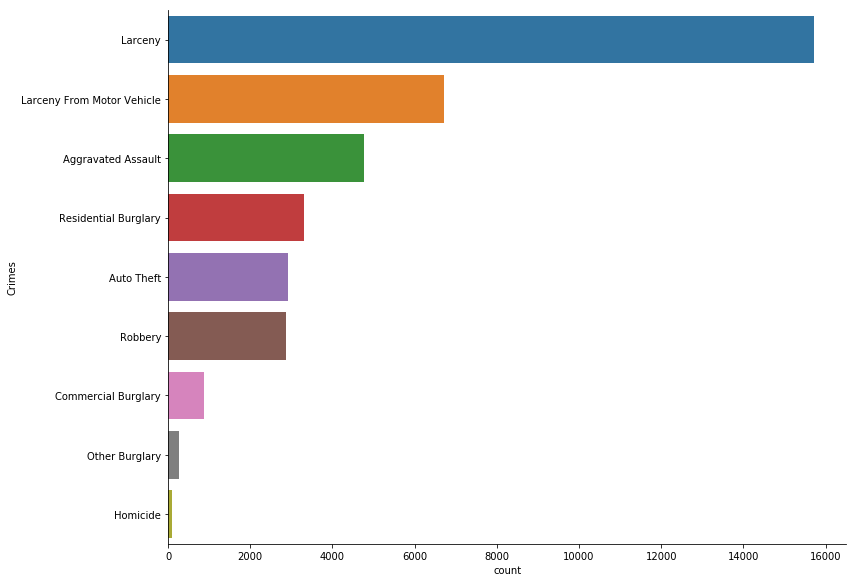

In [18]:
#Fazendo um gráfico sobre os tipos de crimes
sns.catplot(y='Crimes',
           kind='count',
            height=8, 
            aspect=1.5,
            order=data.Crimes.value_counts().index,
           data=data)

Text(-2.575000000000003, 0.5, 'Nº de Crimes')

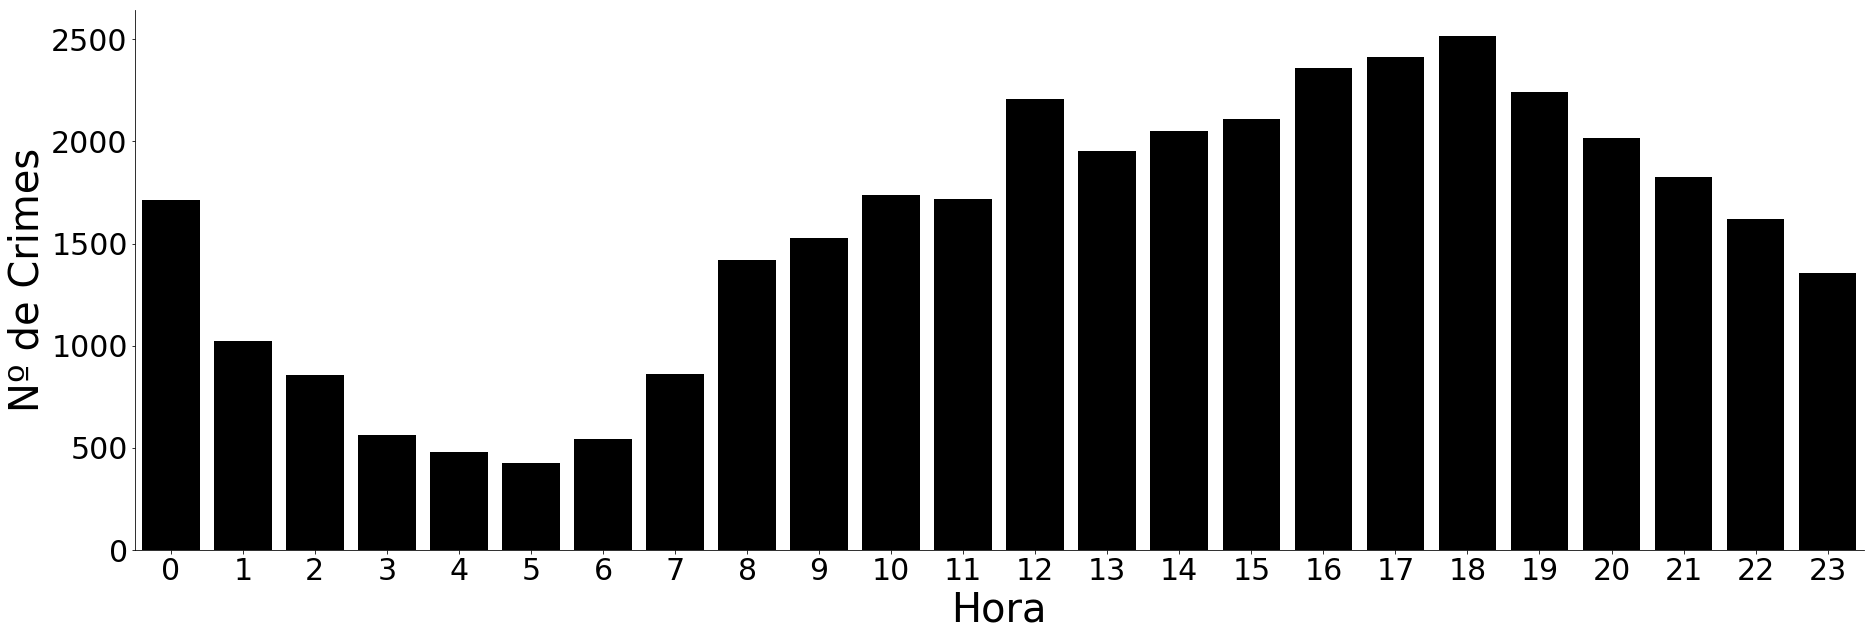

In [19]:
#A hora que mais ocorre os crimes
sns.catplot(x='Hora',
           kind='count',
            height=8.27, 
            aspect=3,
            color='black',
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Hora', fontsize=40)
plt.ylabel('Nº de Crimes', fontsize=40)

Text(-2.4499999999999957, 0.5, 'Nº de Crimes')

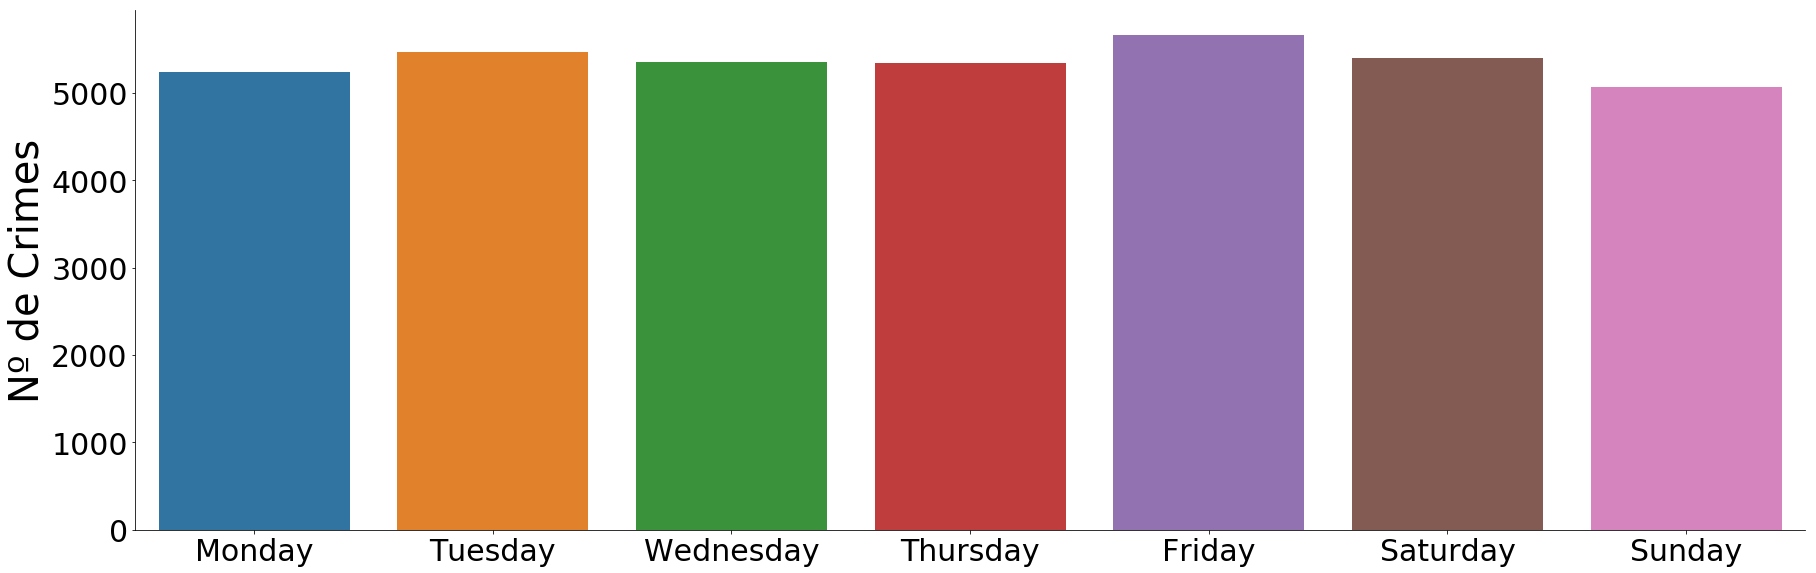

In [20]:
#Números de crimes por dia
sns.catplot(x='Dias da Semana',
           kind='count',
            height=8, 
            aspect=3,
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Nº de Crimes', fontsize=40)

Text(-2.5749999999999957, 0.5, 'Nº de Crimes')

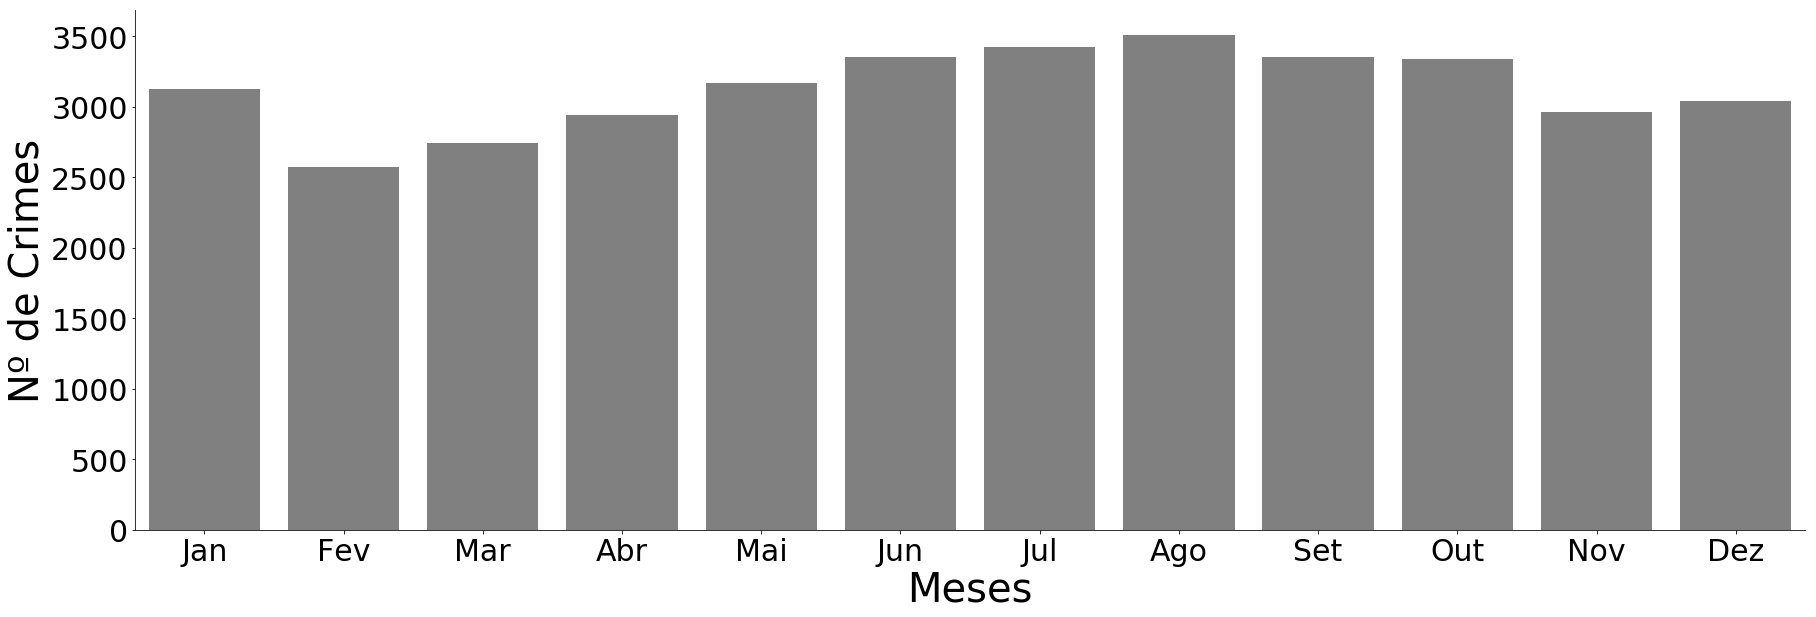

In [21]:
#Números de crimes por mês
mes = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
sns.catplot(x='Mês',
           kind='count',
            height=8, 
            aspect=3,
            color='gray',
           data=data)
plt.xticks(np.arange(12), mes, size=30)
plt.yticks(size=30)
plt.xlabel('Meses', fontsize=40)
plt.ylabel('Nº de Crimes', fontsize=40)

Text(-89.55937499999999, 0.5, 'Rua')

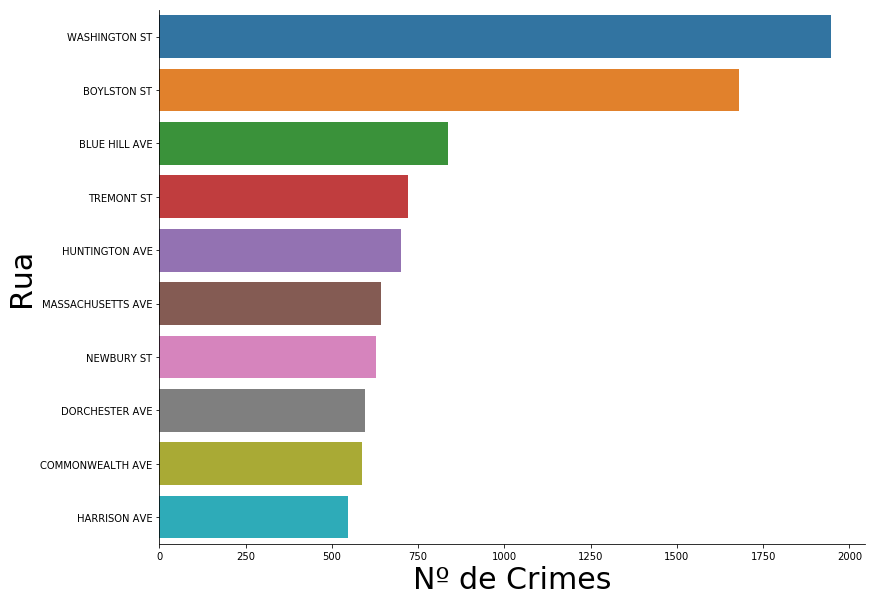

In [23]:
#Gráfico das ruas onde ocorre os crimes
sns.catplot(y='Rua',
           kind='count',
            height=8, 
            aspect=1.5,
            order=data.Rua.value_counts().head(10).index,
           data=data)
plt.xlabel('Nº de Crimes', fontsize=30)
plt.ylabel('Rua', fontsize=30)